# 5-2. 다항 분류

In [1]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])

In [2]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [3]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [4]:
import tensorflow as tf

del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1, random_state=126)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [27]:
tf.random.set_seed(126)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=500, batch_size=64, validation_split=0.25)

Epoch 1/500
61/61 [==============================] - 0s 4ms/step - loss: 0.9593 - accuracy: 0.5040 - val_loss: 0.9227 - val_accuracy: 0.5323
Epoch 2/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8789 - accuracy: 0.5591 - val_loss: 0.8916 - val_accuracy: 0.5446
Epoch 3/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 0.5738 - val_loss: 0.8972 - val_accuracy: 0.5692
Epoch 4/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8625 - accuracy: 0.5774 - val_loss: 0.8900 - val_accuracy: 0.5408
Epoch 5/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.5789 - val_loss: 0.8802 - val_accuracy: 0.5677
Epoch 6/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8605 - accuracy: 0.5848 - val_loss: 0.8812 - val_accuracy: 0.5454
Epoch 7/500
61/61 [==============================] - 0s 2ms/step - loss: 0.8529 - accuracy: 0.5812 - val_loss: 0.8862 - val_accuracy: 0.5700
Epoch 8/500
6

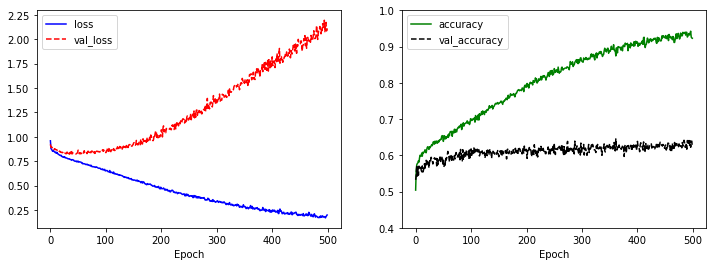

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)
plt.legend()

plt.show()

In [30]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 2.0278 - accuracy: 0.6346


[2.0278103351593018, 0.6346153616905212]